# Asset Allocation Markowits
## Luis Rodriguez Fuentes

In [1]:
import numpy as np;
from pandas.testing import assert_frame_equal;
import pandas as pd;
from pandas_datareader import data as wb;
import matplotlib.pyplot as plt ;

C:\Users\luis_\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets=['NVDA.MX', 'PG.MX','MMM.MX','WMT.MX','CVX.MX','AMD.MX','PINFRA.MX','MSFT.MX','GAPB.MX','AMXL.MX','MCD.MX','GMEXICOB.MX','BA.MX','FEMSAUBD.MX','PEP.MX','HD.MX','JPM.MX','DIS.MX','AAPL.MX','GOOGL.MX']

pf_data= pd.DataFrame()

for a in assets:
  pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-7-1')['Adj Close']

In [3]:
pf_data.head()

,NVDA.MX,PG.MX,MMM.MX,WMT.MX,CVX.MX,AMD.MX,PINFRA.MX,MSFT.MX,GAPB.MX,AMXL.MX,MCD.MX,GMEXICOB.MX,BA.MX,FEMSAUBD.MX,PEP.MX,HD.MX,JPM.MX,DIS.MX,AAPL.MX,GOOGL.MX
Date,,,,,,,,,,,,,,,,,,,,
2011-02-18,306.943451,761.259644,NaN,650.753845,NaN,110.900002,40.848557,322.441376,29.971764,14.504037,900.083740,35.039162,873.386475,62.163521,754.433777,NaN,568.530701,NaN,581.368286,3886.500000
2011-02-28,275.423950,NaN,NaN,620.319153,1222.908936,NaN,41.541698,318.396057,30.050138,14.512410,NaN,34.234550,NaN,61.944992,756.797485,NaN,555.057922,NaN,589.496216,3824.800049
2011-03-09,227.696930,729.294373,NaN,621.678406,NaN,103.330002,44.023899,305.470825,31.872347,13.888895,NaN,32.111183,858.001648,62.973919,NaN,444.287018,546.663025,NaN,580.345947,3627.360107
2011-03-10,223.073456,724.042053,1065.385254,622.042786,1153.525757,102.000000,43.864670,299.876282,31.865820,13.650366,904.106140,30.948919,841.532104,61.944992,764.183167,437.531372,537.953369,503.434509,575.123962,3592.399902
2011-03-28,231.177094,NaN,1088.013550,NaN,1243.942993,NaN,46.880768,303.270386,32.146656,14.144159,884.594788,32.863663,865.891357,63.210659,NaN,NaN,542.805115,NaN,580.069397,3570.800049


In [4]:
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio=[]

In [5]:
num_assets = len(assets)
num_portfolios = 50000
np.random.seed(101)

In [6]:
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns.mean()*250

NVDA.MX        0.389024
PG.MX          0.143487
MMM.MX         0.139968
WMT.MX         0.146676
CVX.MX         0.063753
AMD.MX         0.311056
PINFRA.MX      0.160055
MSFT.MX        0.300391
GAPB.MX        0.194195
AMXL.MX        0.018312
MCD.MX         0.177371
GMEXICOB.MX    0.051788
BA.MX          0.189961
FEMSAUBD.MX    0.096603
PEP.MX         0.150319
HD.MX          0.289462
JPM.MX         0.176012
DIS.MX         0.202652
AAPL.MX        0.308449
GOOGL.MX       0.262391
dtype: float64

In [7]:
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, log_returns.mean()*250)
    volatility = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))
    sharpe = (returns-0.0498) / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [8]:
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [9]:
for counter,symbol in enumerate(assets):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]


In [10]:
df = pd.DataFrame(portfolio)

In [11]:
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in assets]


In [12]:
df.head()

,Returns,Volatility,Sharpe Ratio,NVDA.MX weight,PG.MX weight,MMM.MX weight,WMT.MX weight,CVX.MX weight,AMD.MX weight,PINFRA.MX weight,...,MCD.MX weight,GMEXICOB.MX weight,BA.MX weight,FEMSAUBD.MX weight,PEP.MX weight,HD.MX weight,JPM.MX weight,DIS.MX weight,AAPL.MX weight,GOOGL.MX weight
0,0.201386,0.131854,1.149654,0.053334,0.058939,0.002941,0.017715,0.070776,0.086126,0.031704,...,0.057241,0.036369,0.018786,0.081138,0.099716,0.023998,0.008630,0.062335,0.075291,0.028530
1,0.200750,0.141753,1.064881,0.057682,0.043588,0.004081,0.011604,0.015737,0.083691,0.043824,...,0.076859,0.068002,0.033920,0.030067,0.080203,0.028923,0.072815,0.069884,0.045297,0.077643
2,0.158820,0.119367,0.913317,0.013331,0.014113,0.096264,0.122196,0.021896,0.037815,0.092282,...,0.093406,0.071569,0.005955,0.030730,0.078932,0.016526,0.068628,0.018938,0.007247,0.024464
3,0.174380,0.125292,0.994321,0.042400,0.084115,0.090985,0.045831,0.044197,0.061083,0.031113,...,0.077854,0.064243,0.062471,0.040694,0.062933,0.020048,0.063252,0.050763,0.071744,0.008986
4,0.182955,0.136067,0.978597,0.076949,0.067407,0.068176,0.048734,0.095667,0.019963,0.029329,...,0.007857,0.059558,0.061876,0.037070,0.001299,0.082608,0.037756,0.054109,0.069692,0.066234


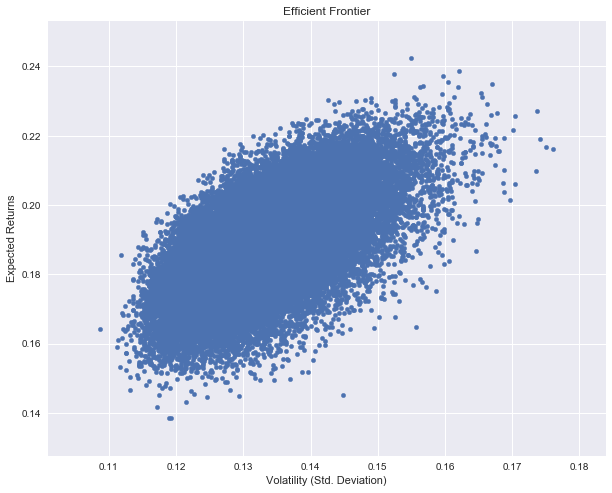

In [13]:
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

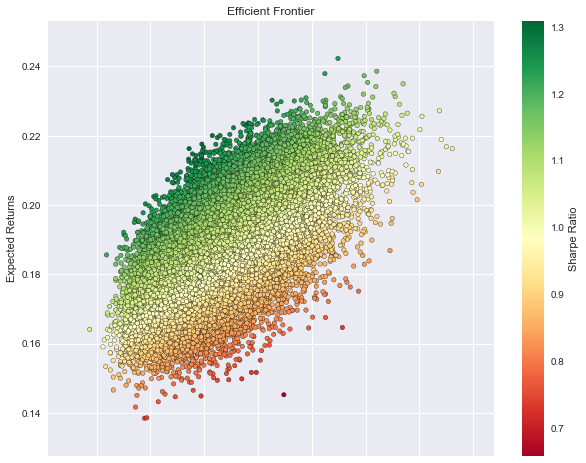

In [14]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [15]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

In [16]:
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

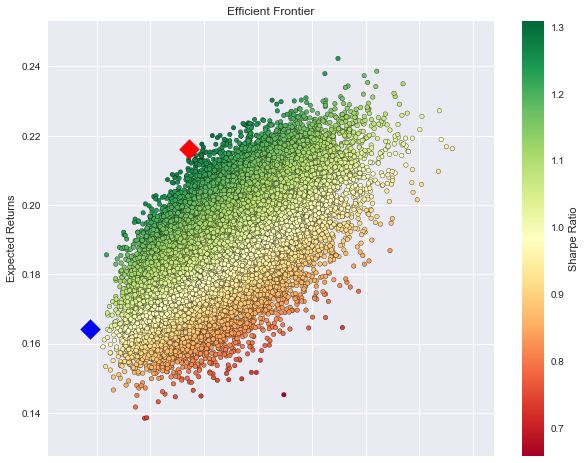

In [17]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [18]:
print(min_variance_port.T)

                       11196
Returns             0.164099
Volatility          0.108688
Sharpe Ratio        1.051623
NVDA.MX weight      0.016867
PG.MX weight        0.096029
MMM.MX weight       0.071990
WMT.MX weight       0.045610
CVX.MX weight       0.100291
AMD.MX weight       0.015865
PINFRA.MX weight    0.076768
MSFT.MX weight      0.016474
GAPB.MX weight      0.065958
AMXL.MX weight      0.014755
MCD.MX weight       0.096823
GMEXICOB.MX weight  0.024600
BA.MX weight        0.001764
FEMSAUBD.MX weight  0.077126
PEP.MX weight       0.101882
HD.MX weight        0.053682
JPM.MX weight       0.036691
DIS.MX weight       0.043118
AAPL.MX weight      0.034687
GOOGL.MX weight     0.009020


## El portafolio optimo a conformar seria:

In [19]:
print(sharpe_portfolio.T)

                       37834
Returns             0.216268
Volatility          0.127191
Sharpe Ratio        1.308810
NVDA.MX weight      0.090940
PG.MX weight        0.098981
MMM.MX weight       0.042792
WMT.MX weight       0.028420
CVX.MX weight       0.050195
AMD.MX weight       0.011678
PINFRA.MX weight    0.093790
MSFT.MX weight      0.105049
GAPB.MX weight      0.092747
AMXL.MX weight      0.012243
MCD.MX weight       0.014528
GMEXICOB.MX weight  0.014356
BA.MX weight        0.045468
FEMSAUBD.MX weight  0.012647
PEP.MX weight       0.052899
HD.MX weight        0.075890
JPM.MX weight       0.029174
DIS.MX weight       0.021520
AAPL.MX weight      0.093531
GOOGL.MX weight     0.013153
